## Dataset Processing for Image Data

In [25]:
# Importing necessary libraries

import numpy as np  # NumPy for numerical operations on arrays and matrices
import os  # Provides functions to interact with the operating system, such as file and directory handling
from pathlib import Path  # A module for handling and manipulating file system paths in an object-oriented way

import matplotlib.pyplot as plt  # Matplotlib for plotting and visualizing data
from keras.preprocessing import image  # Keras image module for image preprocessing like loading, converting, and resizing images


In [2]:
p = Path("Images/")
dirs = p.glob("*")
labels_dict = {'cat':0, 'dog':1}

image_data = []
labels = []    

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path, target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
    

In [3]:
print(len(image_data))
print(len(labels))

404
404


In [4]:
type(image_data)

list

In [5]:
type(labels)

list

In [6]:
print((labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [7]:
## Convert data into numpy array

image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)

(404, 32, 32, 3) (404,)


In [8]:
## Randomly shuffle data

import random 
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

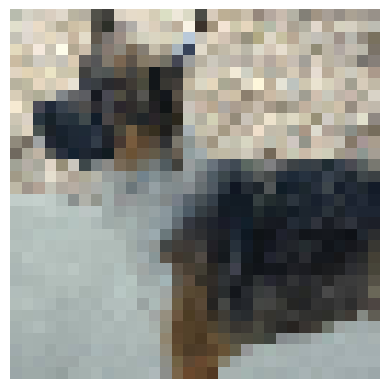

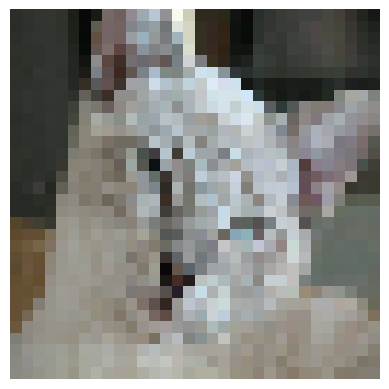

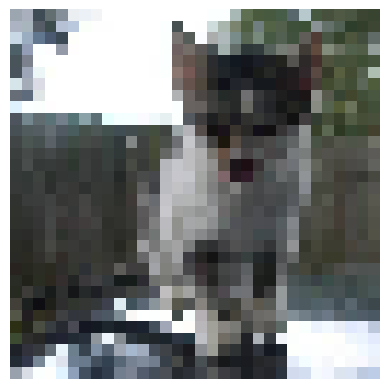

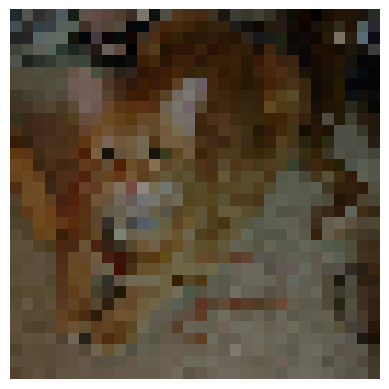

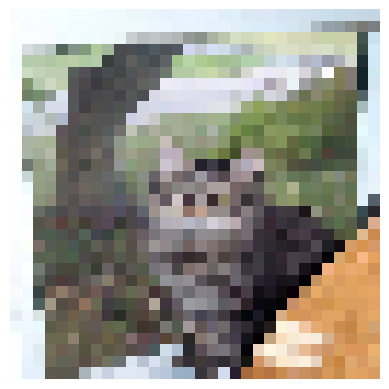

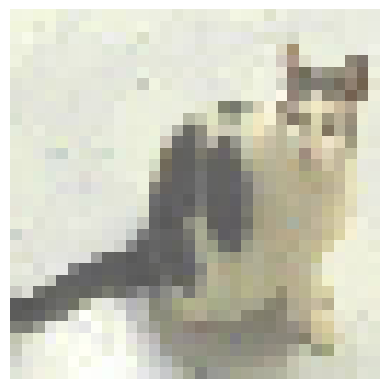

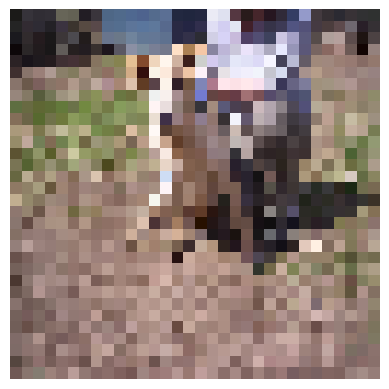

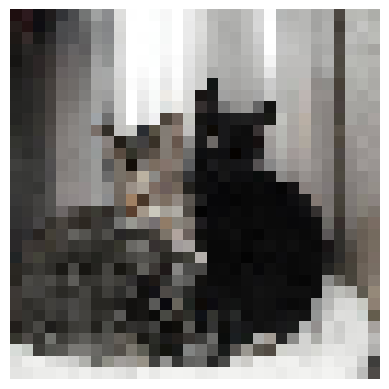

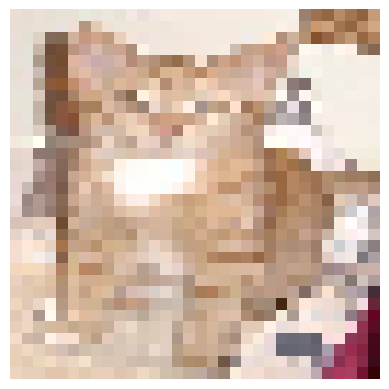

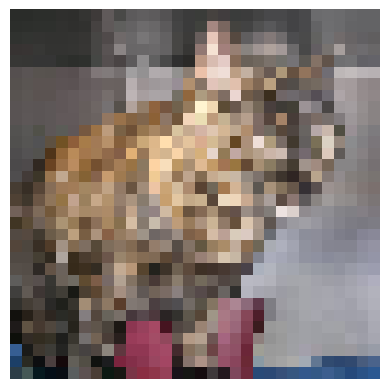

In [9]:
## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data[i])

In [10]:
## Data conversion for classification

M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(404, 3072)
(404,)


## Using scikit

In [11]:
from sklearn import svm

In [12]:
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(image_data, labels)
ypred_sklearn = svm_classifier.predict(image_data)
svm_classifier.score(image_data,labels)

0.7970297029702971

## Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
"""Use this method directly - """
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [15]:
cnf_matrix_sklearn = confusion_matrix(labels, ypred_sklearn)
print(cnf_matrix_sklearn)

[[162  40]
 [ 42 160]]


Confusion matrix, without normalization
[[162  40]
 [ 42 160]]


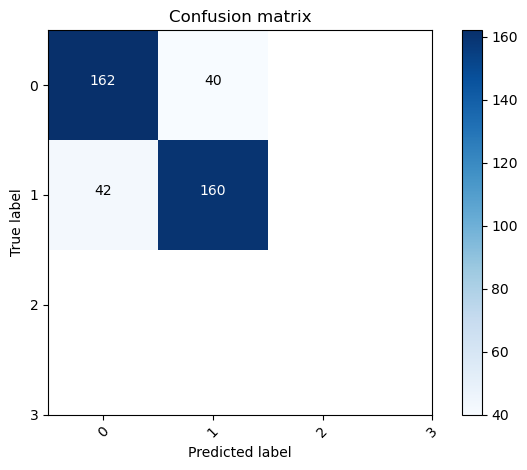

In [16]:
plot_confusion_matrix(cnf_matrix_sklearn, [0,1,2,3],normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)

# Decision Classifier


In [17]:
from sklearn.tree import DecisionTreeClassifier 

In [18]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5)  # Adjust parameters as needed
dt_classifier.fit(image_data, labels)
y_pred_dt = dt_classifier.predict(image_data)
dt_classifier.score(image_data,labels)


0.7698019801980198

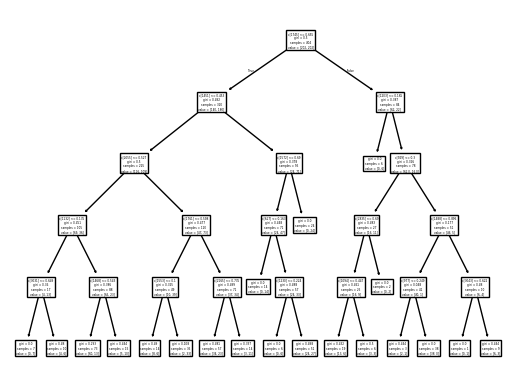

In [19]:
# Optional: Visualize the decision tree
from sklearn.tree import plot_tree
plot_tree(dt_classifier)
plt.show()

In [20]:
cnf_matrix = confusion_matrix(labels, y_pred_dt)
print(cnf_matrix)

[[164  38]
 [ 55 147]]


Confusion matrix, without normalization
[[164  38]
 [ 55 147]]


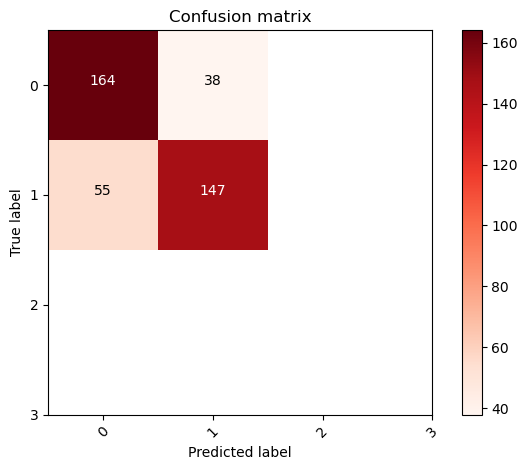

In [21]:
plot_confusion_matrix(cnf_matrix, [0,1,2,3],normalize=False,title='Confusion matrix',cmap=plt.cm.Reds
                      )

# KNN classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [23]:
# Create a KNN classifier with n_neighbors=5 (adjust as needed)


knn_classifier = KNN(n_neighbors=5)

# Fit the KNN classifier to your data
knn_classifier.fit(image_data, labels)

# Make predictions on the image data using KNN
y_pred_knn = knn_classifier.predict(image_data)

# Evaluate the performance of the KNN classifier (optional)
knn_score = knn_classifier.score(image_data, labels)
print("KNN Accuracy:", knn_score)

KNN Accuracy: 0.7004950495049505


In [24]:
cnf_matrix_knn = confusion_matrix(labels, y_pred_knn)
print(cnf_matrix_knn)

[[153  49]
 [ 72 130]]


Confusion matrix, without normalization
[[164  38]
 [ 82 120]]


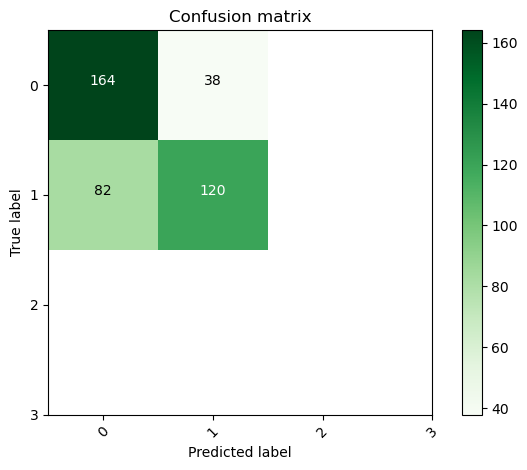

In [91]:
plot_confusion_matrix(cnf_matrix_knn, [0,1,2,3],normalize=False,title='Confusion matrix',cmap=plt.cm.Greens
                      )